# MLOps Project work: Data preprocessing


# MLOps Project work: Data preparation

## 1. Introduction
In this section, the preprocessing of the adult income data set wil be demonstrated. The focus will be on data cleaning and feature engineering.


## 2. Learning objectives
The following objectives will be showcasted:
- Master methods for systematic data cleaning
- Be able to apply feature engineering techniques
- Be able to create a complete preprocessing pipeline
- Understand preprocessing best practices in the MLOps context

## 3. Setup and data preparation


In [188]:
# Benötigte Bibliotheken importieren
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pickle
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer


# Matplotlib für deutsche Beschriftungen konfigurieren
plt.rcParams['axes.formatter.use_locale'] = True


In [189]:
# Datensatz laden
df = pd.read_csv('../data/raw/adult-income.csv')
print(f"Datensatz geladen: {df.shape} (Zeilen, Spalten)")
df

Datensatz geladen: (48842, 15) (Zeilen, Spalten)


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## 4. Data cleaning

### 4.1 Handle missing values

Firstly, the missing values are analyzed. The data set is examined for missing values. Secondly, the distribution of missing values will be visualized. Lastly, a strategy  to handle missing values will be developed and implemented. 

We will first check for missing values. From the previous exploratory data anaylsis, we know that the missing values are marked with '?' in the dataset. 



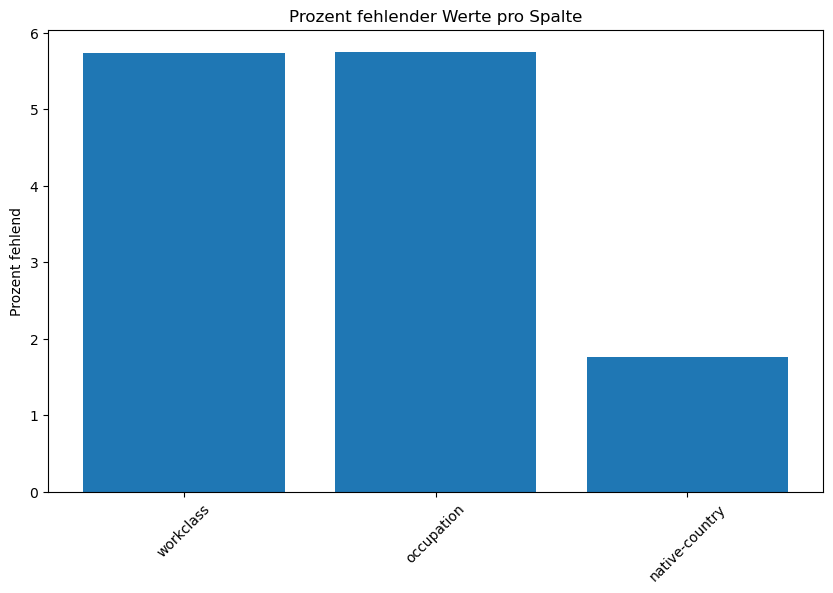

Analyse fehlender Werte:
                Fehlende Werte  Prozent Fehlend
workclass                 2799         5.730724
occupation                2809         5.751198
native-country             857         1.754637


In [190]:
# missing values are marked as '?' in this dataset

def analyse_fehlende_werte(df):
    # number of missing values oer column
    fehlend = (df == '?').sum()
    
    # Percentage of missing values
    fehlend_prozent = (fehlend / len(df)) * 100
    
    # DataFrame with results
    fehlend_info = pd.DataFrame({
        'Fehlende Werte': fehlend,
        'Prozent Fehlend': fehlend_prozent
    })
    
    # visualizing
    plt.figure(figsize=(10, 6))
    plt.bar(fehlend_info[fehlend_info['Fehlende Werte'] > 0].index,
            fehlend_info[fehlend_info['Fehlende Werte'] > 0]['Prozent Fehlend'])
    plt.title('Prozent fehlender Werte pro Spalte')
    plt.xticks(rotation=45)
    plt.ylabel('Prozent fehlend')
    plt.show()
    
    return fehlend_info[fehlend_info['Fehlende Werte'] > 0]


# perform analysis
fehlend_analyse = analyse_fehlende_werte(df)
print("Analyse fehlender Werte:")
print(fehlend_analyse)




The analysis confirms that our missing values are '?' in the dataset. Data are missing in the columns 'workclass', 'occupation', 'native-country'. 

In [191]:
# check for '?' in the dataset

df.isin(['?']).sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

We can observe that Workclass has 2799 missing values, occupation has 2809 missing values and country has 857 missing values. 
The rows with '?' are to be replaced with NaN for better data handling.

In [192]:
# replace '?' with NaN

df['workclass']=df['workclass'].replace('?',np.nan)
df['occupation']=df['occupation'].replace('?',np.nan)
df['native-country']=df['native-country'].replace('?',np.nan)
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


After replacing '?' with NaN in the dataset, we then proceed with creating an overview about the dataset. The overviews consists information about IsNull, IsNa, Duplicate, Unique, Min, Max. 

In [193]:
# check for other missing values

info = pd.DataFrame(df.isnull().sum(),columns=["IsNull"])
info.insert(1,"IsNa",df.isna().sum(),True)
info.insert(2,"Duplicate",df.duplicated().sum(),True)
info.insert(3,"Unique",df.nunique(),True)


# min and max is not applied to string value
#info.insert(4,"Min",data.min(),True)
#info.insert(5,"Max",data.max(),True)


numeric_cols = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']
numeric_data = df[numeric_cols]  # Create a DataFrame with only the numeric columns

if not numeric_data.empty:
    info.insert(4, "Min", numeric_data.min(), True)
    info.insert(5, "Max", numeric_data.max(), True)
else:
    print("No numeric columns found in the dataframe.")

info.T  

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
IsNull,0.0,2799.0,0.0,0.0,0.0,0.0,2809.0,0.0,0.0,0.0,0.0,0.0,0.0,857.0,0.0
IsNa,0.0,2799.0,0.0,0.0,0.0,0.0,2809.0,0.0,0.0,0.0,0.0,0.0,0.0,857.0,0.0
Duplicate,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0
Unique,74.0,8.0,28523.0,16.0,16.0,7.0,14.0,6.0,5.0,2.0,123.0,99.0,96.0,41.0,2.0
Min,17.0,NaN,12285.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,NaN,NaN
Max,90.0,NaN,1490400.0,NaN,16.0,NaN,NaN,NaN,NaN,NaN,99999.0,4356.0,99.0,NaN,NaN


We are going to replace the missing values in the dataset with the following strategy: 

- median for numerical colums: numerical missing values are replaced by median value of the data set
- most frequent for categorical colums: categorical missing values are replaced by most-frequent value of the column 

In [194]:
# Identifying numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Identifying categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)

# Imputer for numerical data
num_imputer = SimpleImputer(strategy='median')
# Imputer for categorical data
cat_imputer = SimpleImputer(strategy='most_frequent')

# Impute numerical columns
df[numerical_cols] = num_imputer.fit_transform(df[numerical_cols])

# Impute categorical columns
df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])

print(df)

Numerical Columns: Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')
Categorical Columns: Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country', 'income'],
      dtype='object')
        age     workclass    fnlwgt     education  educational-num  \
0      25.0       Private  226802.0          11th              7.0   
1      38.0       Private   89814.0       HS-grad              9.0   
2      28.0     Local-gov  336951.0    Assoc-acdm             12.0   
3      44.0       Private  160323.0  Some-college             10.0   
4      18.0       Private  103497.0  Some-college             10.0   
...     ...           ...       ...           ...              ...   
48837  27.0       Private  257302.0    Assoc-acdm             12.0   
48838  40.0       Private  154374.0       HS-grad              9.0   
48839  58.0       Private  151910.0       HS-grad 

To sum up, the dataset was not using the default NaN string for missing values, instead "?" was used. The null or NaN values were marked as '?'. The three columns 'workclass','occupation','native-country have NaN values. 

Based on the results of data exploration, we also know that there are duplicates in the dataset. 52 duplicate rows need to be further handled. We proceed with removing duplicated and NaN values from the dataset.



### 4.2 Handle duplicates and missing values


Furthermore, we discovered that duplicated columns convey the same information such as "education" and "educational-num". Both are in fact same information. Therefore, one column can dropped and the classification of educational levels can be further aggregated. Furthermore, some columns have unnecessary detail grade, for example race. The data column can be summarized into two main groups "white" and "others", as the race groups other than whites are already underrepresented in the dataset. While occupation is further classified into workclass. For example, machine-op-inspection, farming-fishing, craft-repair etc are classified into private workclass.


In this section, duplicates are identified and cleaned up. We will start with checking the record for different types of duplicates, analyzing found duplicates and deciding how to handle duplicates. At last, duplicates are cleaned up. 


In [195]:
# remove duplicates

df = df.drop_duplicates()
df.shape
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25.0,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
1,38.0,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
2,28.0,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
3,44.0,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
4,18.0,Private,103497.0,Some-college,10.0,Never-married,Prof-specialty,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27.0,Private,257302.0,Assoc-acdm,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,0.0,0.0,38.0,United-States,<=50K
48838,40.0,Private,154374.0,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
48839,58.0,Private,151910.0,HS-grad,9.0,Widowed,Adm-clerical,Unmarried,White,Female,0.0,0.0,40.0,United-States,<=50K
48840,22.0,Private,201490.0,HS-grad,9.0,Never-married,Adm-clerical,Own-child,White,Male,0.0,0.0,20.0,United-States,<=50K


We proceeed with removing duplicates. The dataset is cleansed from duplicates. After removing duplicates, we have 48790 rows (with 15 columns) in the dataset. 




"fnlwgt" is dropped as it represents census weights that are not relevant to our project's goal, and education-num as it duplicates data present in the education feature which is used instead. Columns "fnlwgt", "educational-num", "capital-gain", "capital-loss" are not needed. Therefore, these columns are dropped. 

In [196]:
df=df.drop(columns=["fnlwgt", "educational-num"])
df.head()

,age,workclass,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25.0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
1,38.0,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
2,28.0,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
3,44.0,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
4,18.0,Private,Some-college,Never-married,Prof-specialty,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K


Text(0.5, 1.0, 'Histogram')

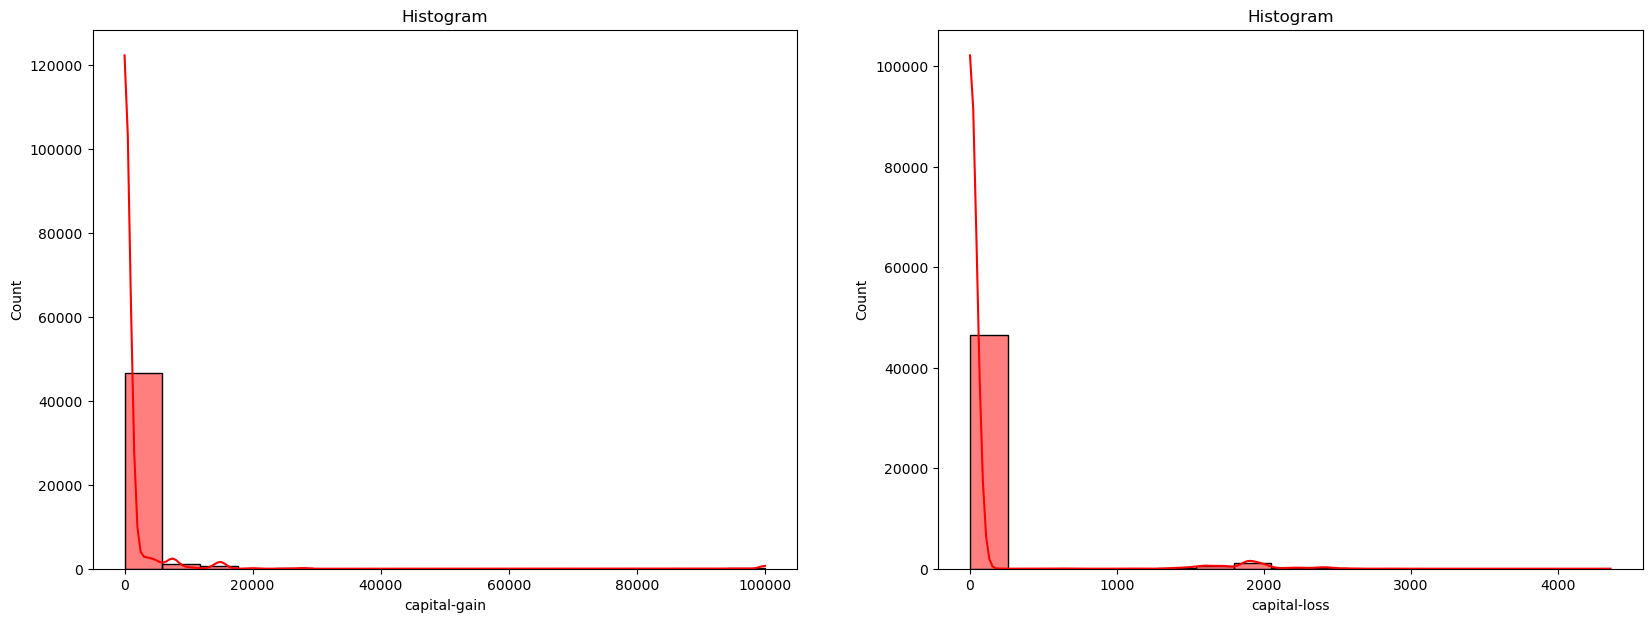

In [197]:
# plot histogram for capital-gain and capital-loss


plt.figure(figsize=(20, 7))
plt.subplot(1, 2, 1)
sns.histplot(df['capital-gain'], kde = True,color='r')
plt.title('Histogram')
plt.subplot(1, 2, 2)
sns.histplot(df['capital-loss'], kde = True,color='r')
plt.title('Histogram')

"capital-gain" and "capital-loss" both columns over 90% data as 0 (capital-gain 91% and capital-loss 95% with value 0) without giving any additional information. Therefore, the two columns are dropped from the dataset.

In [198]:
df=df.drop(columns=["capital-gain", "capital-loss"])

# the remaining columns
df.head()

,age,workclass,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25.0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,40.0,United-States,<=50K
1,38.0,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,50.0,United-States,<=50K
2,28.0,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,40.0,United-States,>50K
3,44.0,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40.0,United-States,>50K
4,18.0,Private,Some-college,Never-married,Prof-specialty,Own-child,White,Female,30.0,United-States,<=50K


Next, we check for outliers and remove them. 

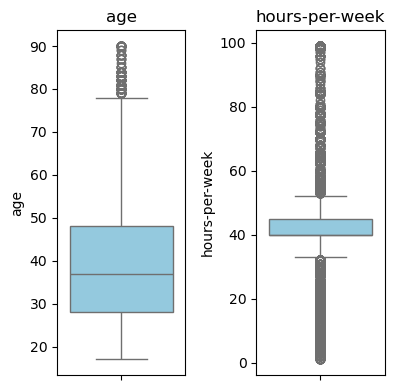

(48789, 11)

In [199]:
# visualizing outliers 
x = 0
#Numerical features;  
numeric_columns = df.select_dtypes(include=['number']).columns
        
# Create a figure with specified size
plt.figure(figsize=(16, 4))

for col in numeric_columns:
    x += 1
    plt.subplot(1, 8, x)
    sns.boxplot(data=df[col], color='skyblue')
    plt.title(col)

plt.tight_layout() 
plt.show()


# size of data frame before removing outliers
df.shape

We will remove outliers in the dataset. 

In [200]:
import numpy as np
from scipy import stats 


# function to remove outliers based on Z-Score
def remove_outliers_zscore(df, threshold=3):
    numeric_columns = df.select_dtypes(include=['number']).columns  # Wähle numerische Spalten aus
    
    # Berechne den Z-Score für numerische Spalten
    z_scores = np.abs(stats.zscore(df[numeric_columns]))  # Absoluten Wert des Z-Scores nehmen
    
    # Filtere Zeilen heraus, bei denen ein Wert einen Z-Score > threshold hat
    df_clean = df[(z_scores < threshold).all(axis=1)]
    
    return df_clean

# function to remove outliers
df = remove_outliers_zscore(df)

# show size of data frame after removing outliers
df.shape


(47936, 11)

Numeric columns without outliers are visualized as below.

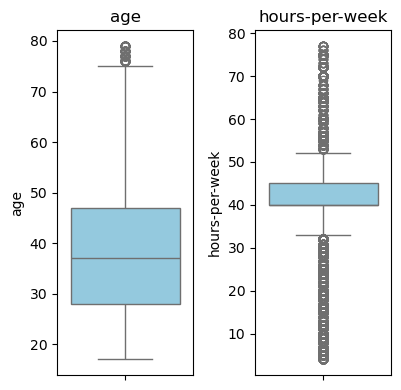

(47936, 11)

In [201]:
# Checking Outliers in Individual Features
x = 0
#Numerical features;  
numeric_columns = df.select_dtypes(include=['number']).columns
        
# Create a figure with specified size
plt.figure(figsize=(16, 4))

for col in numeric_columns:
    x += 1
    plt.subplot(1, 8, x)
    sns.boxplot(data=df[col], color='skyblue')
    plt.title(col)

plt.tight_layout() 
plt.show()

df.shape

Text(0.5, 1.0, '<=50K Income vs >50K Income Count')

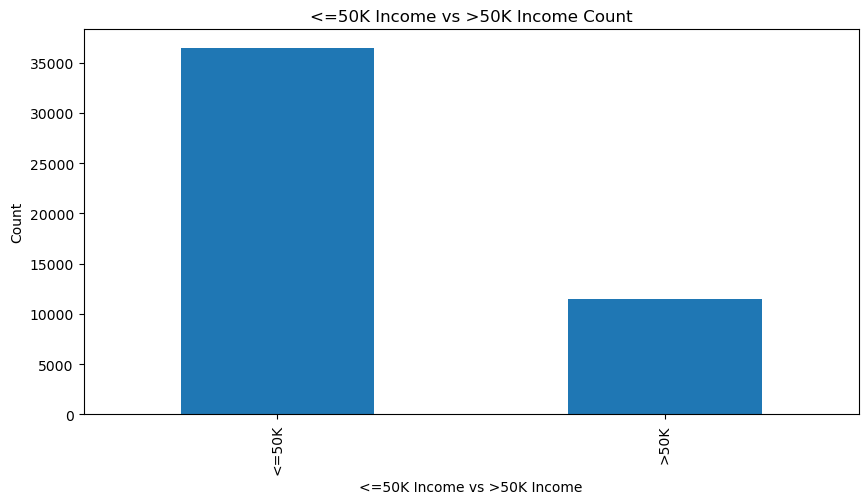

In [202]:
# count of target variable 'income'

plt.figure(figsize=(10,5))
ax = df.income.value_counts().plot(kind = 'bar')
plt.xlabel("<=50K Income vs >50K Income")
plt.ylabel("Count")
plt.title("<=50K Income vs >50K Income Count")

## 5. Feature Engineering

### 5.1 Encoding categorical variables

We will prepare the categorical variables for the next step. All categorical variables in the dataset are identified, the cardinality of each categorical variable is analyzed. Next, appropriate encoding methods are choosen for different variable types and implemented. 



In [203]:

def kategorische_variablen_kodieren(df):
    # Kategorische Spalten identifizieren
    kategorische_spalten = df.select_dtypes(include=['object']).columns
    #kategorische_spalten = kategorische_spalten[kategorische_spalten!="customerID"]
    # Kardinalität analysieren
    kardinalitaet = pd.DataFrame({
        'Spalte': kategorische_spalten,
        'Unique_Werte': [df[spalte].nunique() for spalte in kategorische_spalten]
    })
    print("Kardinalität der kategorischen Variablen:")
    print(kardinalitaet)
    
    # perform encoding
    encoded_df = df.copy()
    
    # label encoding for binary variables
    binary_encoder = LabelEncoder()
    for spalte in kategorische_spalten:
        if df[spalte].nunique() == 2:
            encoded_df[spalte] = binary_encoder.fit_transform(df[spalte])
        else:
            # One-Hot Encoding für nicht-binäre Variablen
            dummies = pd.get_dummies(df[spalte], prefix=spalte)
            encoded_df = pd.concat([encoded_df, dummies], axis=1)
            encoded_df.drop(spalte, axis=1, inplace=True)
    
    return encoded_df

# perform encoding
encoded_df = kategorische_variablen_kodieren(df)
print("\nNeue Features nach Encoding:")
print(encoded_df.columns.tolist())



Kardinalität der kategorischen Variablen:
           Spalte  Unique_Werte
0       workclass             8
1       education            16
2  marital-status             7
3      occupation            14
4    relationship             6
5            race             5
6          gender             2
7  native-country            41
8          income             2

Neue Features nach Encoding:
['age', 'gender', 'hours-per-week', 'income', 'workclass_Federal-gov', 'workclass_Local-gov', 'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc', 'workclass_State-gov', 'workclass_Without-pay', 'education_10th', 'education_11th', 'education_12th', 'education_1st-4th', 'education_5th-6th', 'education_7th-8th', 'education_9th', 'education_Assoc-acdm', 'education_Assoc-voc', 'education_Bachelors', 'education_Doctorate', 'education_HS-grad', 'education_Masters', 'education_Preschool', 'education_Prof-school', 'education_Some-college', 'marital-status_Divo

### 5.2 Generating features


The dataset contains a "native-country" feature. Howerver, other than USA, many of the features have very low numbers of observations, so they are grouped into a single category.



In [204]:
# Replace non-'United-States' values in 'native-country' with 'Others'

df.loc[df["native-country"] != "United-States", "native-country"] = "Others"
df['native-country'].unique()

array(['United-States', 'Others'], dtype=object)

In addition, the dataset has too much categories. These categories can be limited to make the dataset more clearer. We are going to limit the categorization of education and marital-status. They will limited as follows: 

- education: dropout, HighGrad (high school graduate), CommunityCollege, Bachelors, Masters, Doctorate
- marital status: NotMarried, Married, Separated, Widowed
- race: White, Others

This reduces the educational levels from 16 to 6, marital status from 7 to 4 and race from 5 to 2. 


In [205]:
# limit categorization of education
df['education'].replace('Preschool', 'dropout',inplace=True)
df['education'].replace('10th', 'dropout',inplace=True)
df['education'].replace('11th', 'dropout',inplace=True)
df['education'].replace('12th', 'dropout',inplace=True)
df['education'].replace('1st-4th', 'dropout',inplace=True)
df['education'].replace('5th-6th', 'dropout',inplace=True)
df['education'].replace('7th-8th', 'dropout',inplace=True)
df['education'].replace('9th', 'dropout',inplace=True)
df['education'].replace('HS-Grad', 'HighGrad',inplace=True)
df['education'].replace('HS-grad', 'HighGrad',inplace=True)
df['education'].replace('Some-college', 'CommunityCollege',inplace=True)
df['education'].replace('Assoc-acdm', 'CommunityCollege',inplace=True)
df['education'].replace('Assoc-voc', 'CommunityCollege',inplace=True)
df['education'].replace('Bachelors', 'Bachelors',inplace=True)
df['education'].replace('Masters', 'Masters',inplace=True)
df['education'].replace('Prof-school', 'Masters',inplace=True)
df['education'].replace('Doctorate', 'Doctorate',inplace=True)

df['education'].unique()

array(['dropout', 'HighGrad', 'CommunityCollege', 'Masters', 'Bachelors',
       'Doctorate'], dtype=object)

In [206]:
# limit categorization of marital status
df['marital-status'].replace('Never-married', 'NotMarried',inplace=True)
df['marital-status'].replace(['Married-AF-spouse'], 'Married',inplace=True)
df['marital-status'].replace(['Married-civ-spouse'], 'Married',inplace=True)
df['marital-status'].replace(['Married-spouse-absent'], 'NotMarried',inplace=True)
df['marital-status'].replace(['Separated'], 'Separated',inplace=True)
df['marital-status'].replace(['Divorced'], 'Separated',inplace=True)
df['marital-status'].replace(['Widowed'], 'Widowed',inplace=True)

df['marital-status'].unique()


array(['NotMarried', 'Married', 'Widowed', 'Separated'], dtype=object)

In [207]:
# limit categorization of race
df['race'].replace('Black', 'Others',inplace=True)
df['race'].replace(['Amer-Indian-Eskimo'], 'Others',inplace=True)
df['race'].replace(['Other'], 'Others',inplace=True)
df['race'].replace(['Asian-Pac-Islander'], 'Others',inplace=True)

df['race'].unique()

array(['Others', 'White'], dtype=object)

There were missing values in the dataset with placeholders '?'. Now we recheck the dataset, there are no more missing values exist in the dataset.

In [180]:
df.isin(['?']).sum()


age               0
workclass         0
education         0
marital-status    0
occupation        0
relationship      0
race              0
gender            0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [181]:
# check for other missing values

info = pd.DataFrame(df.isnull().sum(),columns=["IsNull"])
info.insert(1,"IsNa",df.isna().sum(),True)
info.insert(2,"Duplicate",df.duplicated().sum(),True)
info.insert(3,"Unique",df.nunique(),True)


# min and max is not applied to string value
#info.insert(4,"Min",data.min(),True)
#info.insert(5,"Max",data.max(),True)


numeric_cols = ['age', 'hours-per-week']
numeric_data = df[numeric_cols]  # Create a DataFrame with only the numeric columns

if not numeric_data.empty:
    info.insert(4, "Min", numeric_data.min(), True)
    info.insert(5, "Max", numeric_data.max(), True)
else:
    print("No numeric columns found in the dataframe.")

info.T  

,age,workclass,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
IsNull,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
IsNa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Duplicate,9786.0,9786.0,9786.0,9786.0,9786.0,9786.0,9786.0,9786.0,9786.0,9786.0,9786.0
Unique,63.0,8.0,6.0,4.0,14.0,6.0,2.0,2.0,73.0,2.0,2.0
Min,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN
Max,79.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.0,NaN,NaN


In [182]:
# Number of rows that have one null values
one_null = sum(df['workclass'].isnull() & ~df['occupation'].isnull() & ~df['native-country'].isnull()) \
           + sum(~df['workclass'].isnull() & df['occupation'].isnull() & ~df['native-country'].isnull()) \
           + sum(~df['workclass'].isnull() & ~df['occupation'].isnull() & df['native-country'].isnull())

# Number of rows that have two null values
two_null = sum(df['workclass'].isnull() & df['occupation'].isnull() & ~df['native-country'].isnull()) \
           + sum(df['workclass'].isnull() & ~df['occupation'].isnull() & df['native-country'].isnull()) \
           + sum(~df['workclass'].isnull() & df['occupation'].isnull() & df['native-country'].isnull())

# Number of rows that have three null values
three_null = sum(df['workclass'].isnull() & df['occupation'].isnull() & df['native-country'].isnull())

# Print the number of rows that have one, two and three null values
print('Number of rows that have one null values:', one_null)
print('Number of rows that have two null values:', two_null)
print('Number of rows that have three null values:', three_null)

Number of rows that have one null values: 0
Number of rows that have two null values: 0
Number of rows that have three null values: 0


In [183]:
# before label encoding
df.head()

,age,workclass,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25.0,Private,dropout,NotMarried,Machine-op-inspct,Own-child,Others,Male,40.0,United-States,<=50K
1,38.0,Private,HighGrad,Married,Farming-fishing,Husband,White,Male,50.0,United-States,<=50K
2,28.0,Local-gov,CommunityCollege,Married,Protective-serv,Husband,White,Male,40.0,United-States,>50K
3,44.0,Private,CommunityCollege,Married,Machine-op-inspct,Husband,Others,Male,40.0,United-States,>50K
4,18.0,Private,CommunityCollege,NotMarried,Prof-specialty,Own-child,White,Female,30.0,United-States,<=50K


In [184]:
import pandas as pd
from sklearn import preprocessing  # WICHTIG: preprocessing importieren

# Kopie der Daten vor der Kodierung erstellen
df1 = df.copy()

# Dictionary zum Speichern der Encoder für jede Spalte
encoders = {}

# Label Encoding für jede kategoriale Spalte
categorical_columns = ['gender', 'workclass', 'education', 'marital-status', 
                       'occupation', 'relationship', 'race', 'native-country', 'income']

for col in categorical_columns:
    encoders[col] = preprocessing.LabelEncoder()  # Neuen Encoder für jede Spalte erstellen
    df[col] = encoders[col].fit_transform(df1[col])  # Werte transformieren und speichern

# Korrekte Mapping-Werte für jede Spalte anzeigen
for col, encoder in encoders.items():
    print(f"Mapping für {col}:")
    mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))  # Mapping-Dictionary erstellen
    for category, code in mapping.items():
        print(f"{code}: {category}")
    print("\n")


Mapping für gender:
0: Female
1: Male


Mapping für workclass:
0: Federal-gov
1: Local-gov
2: Never-worked
3: Private
4: Self-emp-inc
5: Self-emp-not-inc
6: State-gov
7: Without-pay


Mapping für education:
0: Bachelors
1: CommunityCollege
2: Doctorate
3: HighGrad
4: Masters
5: dropout


Mapping für marital-status:
0: Married
1: NotMarried
2: Separated
3: Widowed


Mapping für occupation:
0: Adm-clerical
1: Armed-Forces
2: Craft-repair
3: Exec-managerial
4: Farming-fishing
5: Handlers-cleaners
6: Machine-op-inspct
7: Other-service
8: Priv-house-serv
9: Prof-specialty
10: Protective-serv
11: Sales
12: Tech-support
13: Transport-moving


Mapping für relationship:
0: Husband
1: Not-in-family
2: Other-relative
3: Own-child
4: Unmarried
5: Wife


Mapping für race:
0: Others
1: White


Mapping für native-country:
0: Others
1: United-States


Mapping für income:
0: <=50K
1: >50K




In [185]:
import pandas as pd
from sklearn import preprocessing  # WICHTIG: preprocessing importieren

# LabelEncoder initialisieren
label_encoder = preprocessing.LabelEncoder()

# Kopie des ursprünglichen DataFrames erstellen (falls nicht bereits geschehen)
df1 = df.copy()

# Label Encoding für jede kategoriale Spalte
categorical_columns = ['gender', 'workclass', 'education', 'marital-status', 
                       'occupation', 'relationship', 'race', 'native-country', 'income']

for col in categorical_columns:
    df1[col] = label_encoder.fit_transform(df1[col])

# Die ersten Zeilen nach Label-Encoding anzeigen
df1.head()


,age,workclass,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25.0,3,5,1,6,3,0,1,40.0,1,0
1,38.0,3,3,0,4,0,1,1,50.0,1,0
2,28.0,1,1,0,10,0,1,1,40.0,1,1
3,44.0,3,1,0,6,0,0,1,40.0,1,1
4,18.0,3,1,1,9,3,1,0,30.0,1,0


In [186]:
# writing to a csv file
# df1 is data after processed

df1.to_csv('../data/raw/adult-income-processed.csv', index=False)


The label encoded data is written to csv file.